<a href="https://colab.research.google.com/github/alexandrecassimiro/VD/blob/main/acessar_arquivo_em_outro_drive_e_gerar_a_nuvem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import json
import requests

# URL do arquivo JSON
# url = "https://www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json"
url = "https://drive.google.com/file/d/1jhAKoI64yXcezsTUh173CYqV0Boh9U8X/view?usp=sharing "
# Faz o download do arquivo JSON
try:
  response = requests.get(url)
  response.raise_for_status = ()
  all_series_lines = response.json()
except (requests.HTTPError, json.JSONDecodeError) as e:
  # print("Puf!", str(e))
  # print("Puf!")
  pass


In [56]:
# Transformar o dicionário em um DataFrame
df = pd.DataFrame([(series_name, episode_number, character, line) for series_name, episodes in all_series_lines.items()
                   for episode_number, lines in episodes.items()
                   for character, lines_list in lines.items()
                   for line in lines_list],
                  columns=['series_name', 'episode_number', 'character', 'line'])
df

,series_name,episode_number,character,line
0,ENT,episode 0,KLAANG,
1,ENT,episode 0,KLAANG,
2,ENT,episode 0,KLAANG,Pung ghap! Pung ghap!
3,ENT,episode 0,KLAANG,DujDaj Hegh!
4,ENT,episode 0,KLAANG,Tujpa'qyl Dun.
...,...,...,...,...
266649,VOY,episode 159,SABRINA,Ah ha.
266650,VOY,episode 159,SABRINA,I don't remember you.
266651,VOY,episode 159,SABRINA,Why?
266652,VOY,episode 159,SABRINA,For four years?


# Colocar o filtro aqui

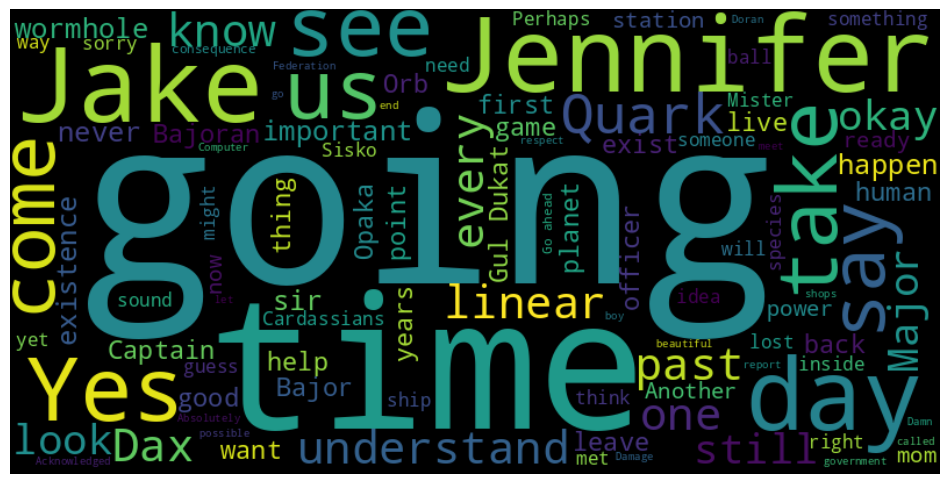

In [67]:
#@title Click `Show code` in the code cell. { display-mode: "form" }
# com maxwords 100

# import json
# import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Lendo o arquivo JSON e armazenando o conteúdo em um objeto Python
# with open('all_series_lines.json') as f:
#     all_series_lines = json.load(f)
#explorando...
# for i in all_series_lines:
#    print(i)
#    print(all_series_lines[seriado][epi][pers])


# Acessando as linhas conforme filtro recebido
lines = all_series_lines['DS9']['episode 0']['SISKO']
# lines = all_series_lines[seriado][epi][pers]
# print(lines)


# Convertendo as linhas em um dicionário
lines_dict = {}
for i, line in enumerate(lines):
    lines_dict[str(i+1)] = line

# Convertendo o dicionário em um dataframe
df = pd.DataFrame.from_dict(lines_dict, orient='index', columns=['line'])

# Gerando a nuvem de palavras

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['line']))
# wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=10).generate(' '.join(df['line']))
# wordcloud = WordCloud(contour_width=1000, width=800, height=400, background_color='white', max_words=MAX).generate(' '.join(df['line']))
wordcloud = WordCloud(contour_width=1000, width=800, height=400, background_color='black', max_words=100).generate(' '.join(df['line']))

# Exibindo a nuvem
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# # Convertendo a nuvem de palavras para um objeto Plotly
# fig = go.Figure(go.Image(z=wordcloud.to_array()))
# fig.show()  #acho que sem o abaido vai ficar melhor

In [33]:
# Monta o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from google.colab import drive

# # Monta o Google Drive
# drive.mount('/content/drive')

import json

# Caminho para o arquivo JSON no Google Drive
# caminho_arquivo = '/content/drive/MyDrive/AVD/all_series_lines.json'
caminho_arquivo = 'https://drive.google.com/file/d/1jhAKoI64yXcezsTUh173CYqV0Boh9U8X/view?usp=sharing'


print(caminho_arquivo)


https://drive.google.com/file/d/1jhAKoI64yXcezsTUh173CYqV0Boh9U8X/view?usp=sharing


In [39]:
# Abre o arquivo JSON
with open(caminho_arquivo, 'r') as arquivo:
    all_series_lines = json.load(arquivo)

# Agora você pode trabalhar com os dados JSON
# Por exemplo, imprimir o JSON
# print(json_data)

FileNotFoundError: ignored

In [37]:
# Transformar o dicionário em um DataFrame
df = pd.DataFrame([(series_name, episode_number, character, line) for series_name, episodes in all_series_lines.items()
                   for episode_number, lines in episodes.items()
                   for character, lines_list in lines.items()
                   for line in lines_list],
                  columns=['series_name', 'episode_number', 'character', 'line'])
df

,series_name,episode_number,character,line
0,ENT,episode 0,KLAANG,
1,ENT,episode 0,KLAANG,
2,ENT,episode 0,KLAANG,Pung ghap! Pung ghap!
3,ENT,episode 0,KLAANG,DujDaj Hegh!
4,ENT,episode 0,KLAANG,Tujpa'qyl Dun.
...,...,...,...,...
266649,VOY,episode 159,SABRINA,Ah ha.
266650,VOY,episode 159,SABRINA,I don't remember you.
266651,VOY,episode 159,SABRINA,Why?
266652,VOY,episode 159,SABRINA,For four years?


In [40]:
import pandas as pd
import json
import requests

# URL do arquivo JSON
# url = "https://www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json"
url = "https://drive.google.com/file/d/1jhAKoI64yXcezsTUh173CYqV0Boh9U8X/view?usp=sharing "
# Faz o download do arquivo JSON
response = requests.get(url)
data = response.json()

JSONDecodeError: ignored

In [21]:
import os
from google.colab import files

# Move o arquivo kaggle.json para o local correto
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/all_series_lines.json
# !chmod 600 /root/.kaggle/datasets/gjbroughton/start-trek-scripts/all_series_lines.json
!chmod 600 /www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json

# Configura a variável de ambiente para o diretório
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json': No such file or directory


In [23]:
import os
from google.colab import files

# Move o arquivo kaggle.json para o local correto

# !mkdir -p /root/.kaggle
# !mkdir -p https://www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json
!mkdir -p /www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Configura a variável de ambiente para o diretório
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import json
import requests

# URL do arquivo JSON
url = "https://www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json"
# url = f'https://www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json'

url

'https://www.kaggle.com/datasets/gjbroughton/start-trek-scripts?select=all_series_lines.json'

In [9]:
# Faz o download do arquivo JSON
response = requests.get(url)
data = response.json()
print(data)

JSONDecodeError: ignored

In [7]:
# Faz o download do arquivo JSON
response = requests.get(url)
data = response.json()

JSONDecodeError: ignored

In [ ]:
# Extrai a estrutura do JSON
all_series_lines = data['all_series_lines']

# Cria uma lista vazia para armazenar os dados
df_data = []

# Itera sobre os dados do JSON e extrai as informações necessárias
for series_name, episodes in all_series_lines.items():
    for episode_number, characters in episodes.items():
        for character, all_lines in characters.items():
            df_data.append([series_name, episode_number, character, all_lines])

# Cria o DataFrame
df = pd.DataFrame(df_data, columns=['Series', 'Episode', 'Character', 'Lines'])

# Exibe o DataFrame
print(df)

In [11]:
!pip install kaggle
import kaggle.api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import kaggle.api

OSError: ignored

In [10]:
import kaggle.api

# Baixa o arquivo desejado
kaggle.api.dataset_download_files('./gjbroughton/start-trek-scripts', 'all_series_lines.json', unzip=False)

OSError: ignored